##### The IMD Machine Learning Model:
Credit to: `Isaac Okello Opio`
The following were perfromed in this step:
1. Take a peek at the raw data.
2. Review the dimensions of my dataset.
3. Review the data types of attributes in the data.


In [31]:
#Import libraries
from pycaret import*
import pandas as pd #this is for dataframe manipulation
import numpy as np #this is for numerical / mathematical computing
import matplotlib.pyplot as plt #this is for visualisation
from IPython.display import display

In [32]:
#import data
IMD_data = pd.read_stata ("DATASET16MARCH2024.dta")

In [33]:
#EDA
IMD_data.head(5)

,PatientID,age,agecatak,AgeCategory,sex1,religion1,childeduc1,heightst1,weightst1,height_m,...,stin2vntr_,httlpr1,HTTLPRrs35531,rs35531,Rs10482605,Rs1360780,rs1386494,rs1843809,rs34517220,_merge
0,CHAKA/01/01/0001,11.668720,9-12,Adolescent,Female,Born Again,Pre-primary,134.0,31.0,1.340,...,NaN,SS,NaN,NaN,A:A,C:T,A:A,G:G,A:A,matched (3)
1,CHAKA/01/01/0002,15.000000,13-17,Adolescent,Male,Protestant,Pre-primary,137.0,35.0,1.370,...,12/12,SS,SA/SA,A:A,A:A,C:T,A:A,G:G,A:A,matched (3)
2,CHAKA/01/01/0003,6.020534,9-12,Adolescent,Female,Muslim,Pre-primary,120.1,19.0,1.201,...,10/10,LL,LA/LG,A:G,G:A,C:T,G:A,T:G,A:A,matched (3)
3,CHAKA/01/02/0152,5.242984,5-8,Children,Female,Catholic,Pre-primary,99.0,15.0,0.990,...,12/12,LS,SA/LG,A:G,A:A,C:C,G:A,T:G,A:A,matched (3)
4,CHAKA/01/02/0153,11.696098,9-12,Adolescent,Female,Muslim,Pre-primary,131.6,30.0,1.316,...,12/12,LL,LA/LA,A:A,A:A,C:C,G:G,T:G,G:A,matched (3)


In [34]:
# List variable names
variable_names = IMD_data.columns.tolist()

# Print the variable names
print(variable_names)

['PatientID', 'age', 'agecatak', 'AgeCategory', 'sex1', 'religion1', 'childeduc1', 'heightst1', 'weightst1', 'height_m', 'BMI', 'rounded_bmi', 'BMI_category', 'childtrib1', 'motherali1', 'fatherali1', 'orphanhood', 'ses', 'ses_cat', 'livelihood1', 'sexualever1', 'childstay1', 'childartk1', 'childworst1', 'childpremt1', 'chilborhiv', 'tobacco_status', 'alcohol1', 'Stress', 'GroupCategory', 'cd4takeoff1', 'CD4_category', 'Viralload', 'Viralload_Category', 'tlbase', 'ptsd', 'gad', 'mdd', 'pc', 'intdis', 'IMDs', 'stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'Rs10482605', 'Rs1360780', 'rs1386494', 'rs1843809', 'rs34517220', '_merge']


### FOR JOINT ANALYSIS (ALL THREE CATEGORIES)

In [35]:
#Dropping Non-Important and Redundant Variables 
# List of variables to drop

columns_to_drop = ['PatientID', 'age', 'height_m', 'BMI', 'rounded_bmi', 'motherali1', 'fatherali1', 'ses', 'childworst1', 'cd4takeoff1', 'CD4_category', 'Viralload', 'Viralload_Category', 'tlbase', 'ptsd', 'gad', 'mdd', 'pc', 'intdis', 'stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'Rs10482605', 'Rs1360780', 'rs1386494', 'rs1843809', 'rs34517220', '_merge']

# Dropping the specified columns
IMD_data = IMD_data.drop(columns=columns_to_drop)

Note: Removing MDD, PTSD, and GAD as they are used to get IMDs

##### Dimensions of the Data
I had to check how much data I have, both in terms of rows and columns.
- Too many rows and algorithms may take too long to train. Too few and perhaps I do
not have enough data to train the algorithms.
- Too many features and some algorithms can be distracted or super poor performance due
to the curse of dimensionality.

In [36]:
print("Number of rows:", IMD_data.shape[0])
print("Number of columns:", IMD_data.shape[1])
#OR
print("The dimension is:", IMD_data.shape)

Number of rows: 736
Number of columns: 22
The dimension is: (736, 22)


##### Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to foating point values or integers to represent categorical or ordinal values. 

In [37]:
IMD_data.dtypes

agecatak            object
AgeCategory         object
sex1              category
religion1         category
childeduc1        category
heightst1          float64
weightst1          float64
BMI_category      category
childtrib1        category
orphanhood        category
ses_cat           category
livelihood1       category
sexualever1       category
childstay1        category
childartk1        category
childpremt1       category
chilborhiv        category
tobacco_status      object
alcohol1          category
Stress            category
GroupCategory     category
IMDs              category
dtype: object

#### Descriptive Statistics
Descriptive statistics can give a great insight into the shape of each attribute. 

In [38]:
IMD_data.describe().T

,count,mean,std,min,25%,50%,75%,max
heightst1,733.0,131.050887,22.690718,12.5,119.0,130.6,144.0,427.2
weightst1,736.0,29.878111,11.915348,10.0,21.0,27.0,36.0,153.0


#### Dependent Variable (DV)
Note that: The DV in this cases was being diagnosed with Internalizing Mental Disorder, IMD (Yes) or Not (No), This was calculated by ensuring all participants without any from of GAD, MDD, or PTSD, was assigned as "Not having IMD", while all those with any form of GAD, MDD, or PTSD, was amrked as having IMD. 

<Axes: xlabel='IMDs'>

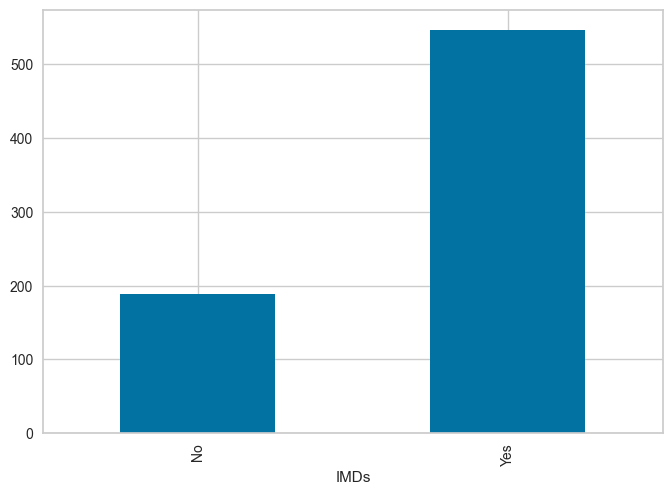

In [39]:
##Plotting the distribution of the dependent variable (DV). 
IMD_data.groupby('IMDs').size().plot(kind='bar')

In [40]:
#Checking at the distribution of the data
#IMD_data.hist()

NOTE: The above was not useful as the package (pycaret) cound perfrom transformations in all datasets. Unlike in scikit-learn that I would have to decide the data to transform based on the above plot. 

#### MODEL BUILDING USING PYCARET
Since this was a classification problem (Supervised machine learning),the classification package from pycaret was used. Thisn package conatins several algorithms:

* Logistic Regression
* Support Vector Machines
* Decision Trees
* Naive Bayes
* K-Nearest Neighbors
* Random Forests

In [41]:
#Import classification model from pycaret
from pycaret.classification import *

In [42]:
# Setting up the data for machine learning modeling using the pycaret setup function
# IMD_data: Your dataset or data structure
# target='IMDs': Specifying 'IMDs' as the target variable to predict
# session_id=123: Setting a session ID (seed) for reproducibility

s = setup(IMD_data, target='IMDs', session_id=123)

,Description,Value
0,Session id,123
1,Target,IMDs
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(736, 22)"
5,Transformed data shape,"(736, 54)"
6,Transformed train set shape,"(515, 54)"
7,Transformed test set shape,"(221, 54)"
8,Numeric features,2
9,Categorical features,19


In [43]:
#Model training
# Comparing and selecting the best-performing model based on default evaluation metric
best = s.compare_models()

# Retrieve the metrics dataframe for all compared models
metrics_df = pull()
print(metrics_df)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:44:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7437,0.0000,0.7437,0.5531,0.6344,0.0000,0.0000,0.4160
rf,Random Forest Classifier,0.7378,0.0000,0.7378,0.6915,0.6904,0.1347,0.1589,0.7460
ada,Ada Boost Classifier,0.7340,0.0000,0.7340,0.6988,0.6974,0.1660,0.1849,0.4660
ridge,Ridge Classifier,0.7282,0.0000,0.7282,0.6693,0.6681,0.0795,0.1000,0.3920
lr,Logistic Regression,0.7281,0.0000,0.7281,0.6801,0.6823,0.1189,0.1336,4.2240
lda,Linear Discriminant Analysis,0.7243,0.0000,0.7243,0.6775,0.6822,0.1203,0.1349,0.3580
gbc,Gradient Boosting Classifier,0.7202,0.0000,0.7202,0.6832,0.6870,0.1339,0.1498,0.5310
knn,K Neighbors Classifier,0.7146,0.0000,0.7146,0.6646,0.6711,0.0860,0.1011,0.5230
et,Extra Trees Classifier,0.7084,0.0000,0.7084,0.6684,0.6754,0.1028,0.1152,0.5430
lightgbm,Light Gradient Boosting Machine,0.7049,0.0000,0.7049,0.6733,0.6807,0.1265,0.1346,1.4100


                                    Model  Accuracy  AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.7437  0.0  0.7437  0.5531   
rf               Random Forest Classifier    0.7378  0.0  0.7378  0.6915   
ada                  Ada Boost Classifier    0.7340  0.0  0.7340  0.6988   
ridge                    Ridge Classifier    0.7282  0.0  0.7282  0.6693   
lr                    Logistic Regression    0.7281  0.0  0.7281  0.6801   
lda          Linear Discriminant Analysis    0.7243  0.0  0.7243  0.6775   
gbc          Gradient Boosting Classifier    0.7202  0.0  0.7202  0.6832   
knn                K Neighbors Classifier    0.7146  0.0  0.7146  0.6646   
et                 Extra Trees Classifier    0.7084  0.0  0.7084  0.6684   
lightgbm  Light Gradient Boosting Machine    0.7049  0.0  0.7049  0.6733   
dt               Decision Tree Classifier    0.6776  0.0  0.6776  0.6856   
svm                   SVM - Linear Kernel    0.5998  0.0  0.5998  0.5494   
qda       Qu

In [44]:
#Print the best model
print(best)

DummyClassifier(constant=None, random_state=123, strategy='prior')


In [45]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
# Save specific plots using plot_model with save=True

# List of plot types to include
#plot_types = ['auc', 'confusion_matrix', 'feature', 'learning']

# Iterate over plot types and save each one
#for plot_type in plot_types:
    #plot_model(best, plot=plot_type, save=True, verbose=False)

In [47]:
#DISPLAY THE PLOTS
#Import the package
from IPython.display import Image, display

# Display the PNG images
# display(Image('Calibration Curve.png'))
# display(Image("AUC.png"))
# display(Image("Confusion Matrix.png"))
# display(Image("Feature Importance.png"))
# display(Image("Learning Curve.png"))

#### The Predict Hold DATA (Testing/assess perfromace)
The predict_holdout is a portion of the dataset that is intentionally set aside and not used during the training of the model. This set is reserved for evaluating the model's performance on unseen data.

In [48]:
#predict/testing
predict_holdout =s.predict_model(best) #Making predictions on the holdout set using the best model (predict_model)

#Retrieve the metrics dataframe
metrics_df = pull() #Calculating various classification metrics based on the predictions made
print(metrics_df) #Printing the metrics dataframe to the console

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7421,0.5000,0.7421,0.5507,0.6322,0.0000,0.0000


              Model  Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0  Dummy Classifier    0.7421  0.5  0.7421  0.5507  0.6322    0.0  0.0


In [49]:
# Predicting on new data

# Creating a copy of the original data without the 'IMDs' column
New_IMD_data = IMD_data.copy().drop('IMDs', axis=1)

# Making predictions on the new data using the best-performing model
New_Predictions = s.predict_model(best, New_IMD_data)

# Displaying the first 5 rows of the predictions
New_Predictions.head(5)

,agecatak,AgeCategory,sex1,religion1,childeduc1,heightst1,weightst1,BMI_category,childtrib1,orphanhood,...,childstay1,childartk1,childpremt1,chilborhiv,tobacco_status,alcohol1,Stress,GroupCategory,prediction_label,prediction_score
0,9-12,Adolescent,Female,Born Again,Pre-primary,134.000000,31.0,Underweight,Non-Munganda but Ugandan,Single parent alive,...,Kampala city,Yes,Was not a premature at birth,Yes,Never,Never,mild stress,cases,Yes,0.7437
1,13-17,Adolescent,Male,Protestant,Pre-primary,137.000000,35.0,Normal weight,Non-Munganda but Ugandan,Single parent alive,...,NaN,Yes,Was not a premature at birth,Yes,Never,Never,severe stress,cases,Yes,0.7437
2,9-12,Adolescent,Female,Muslim,Pre-primary,120.099998,19.0,Underweight,Muganda,Both parents alive,...,Outside Kampala,Yes,Was not a premature at birth,Yes,Never,Never,moderate stress,controls,Yes,0.7437
3,5-8,Children,Female,Catholic,Pre-primary,99.000000,15.0,Underweight,Non-Munganda but Ugandan,NaN,...,Kampala city,Yes,Was not a premature at birth,Yes,Never,Never,severe stress,controls,Yes,0.7437
4,9-12,Adolescent,Female,Muslim,Pre-primary,131.600006,30.0,Underweight,Muganda,Both parents alive,...,Outside Kampala,Yes,Was not a premature at birth,Yes,Never,Never,moderate stress,cases,Yes,0.7437
